In [1]:
import pandas as pd

#### Fazendo leitura dos dados

In [2]:
dados = pd.read_csv('marketing_investimento.csv')

In [3]:
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [5]:
import plotly.express as px

# Varáveis categóricas 

## Análise exploratória

#### usando histograma para verificar se existe inconsistencia nas colunas

In [6]:
px.histogram(dados, x='aderencia_investimento', text_auto=True)

In [7]:
#se existe uma relacao entre o estado civil e a aderencia de investimento
px.histogram(dados, x='estado_civil', text_auto=True, color= 'aderencia_investimento',barmode='group')

#### conclusao: pessoas casadas tendem a nao aderir ao investimento mais que os outros estados civis

In [8]:
#verificando se o nivel de escolaridade influencia na aderencia de investimento
px.histogram(dados, x='escolaridade', text_auto=True, color= 'aderencia_investimento',barmode='group')

#### conclusao: pessoas com maior nivel de escolaridade tendem a aderir mais a investimento

In [9]:
px.histogram(dados, x='inadimplencia', text_auto=True, color= 'aderencia_investimento',barmode='group')

#### conclusao: pessoas que nao inadimplentes optam por aderir mais ao investimento do que pessoas que sao inadimplentes

In [10]:
px.histogram(dados, x='fez_emprestimo', text_auto=True, color= 'aderencia_investimento',barmode='group')

## Variaveis numericas

In [11]:
px.box(dados, x='idade', color='aderencia_investimento')

In [12]:
px.box(dados, x='saldo', color='aderencia_investimento')

In [13]:
px.box(dados, x='tempo_ult_contato', color='aderencia_investimento')

In [14]:
px.box(dados, x='numero_contatos', color='aderencia_investimento')

#### conclusao: nao tem nenhuma incosistencia na base de dados

In [15]:
x = dados.drop('aderencia_investimento', axis=1)
y = dados['aderencia_investimento']

#### Divindo dataset em variaveis explicativas e variavel alvo('aderencia_investimento')

In [16]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [17]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

#### Usando one hot enconde para tratamento em variaveis explicativas que sao strings em numeros e o algoritmo consiga entender

In [18]:
# usando a biblioteca do sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
#armazenando as variaveis explicativas em uma outra variavel
colunas = x.columns

In [20]:
colunas

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos'],
      dtype='object')

In [21]:
#usando funcao capaz de transformar o valor das colunas

#1 parametro: tipo de tranformacao, no caso -> ondehotenconde
#2 parametro: em quais colunas quero fazer essa transformacao
#3 parametro: o que sera feito com as demais colunas que nao foram selecionadas

one_hot = make_column_transformer((
    #se a variavel(coluna) tiver apenas duas categorias (sim/nao) ele vai remover
    OneHotEncoder(drop ='if_binary'),
    #passing the columns that will be transformed
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']),
    #will be ignore the other columns that not will be transformed
    remainder= 'passthrough',
    #in process, the columns keep values
    sparse_threshold=0)

In [22]:
#usando o metodo fit transformer para encontrar o padrao e fazer a transformacao dos dados
x = one_hot.fit_transform(x)

In [23]:
#com base no nome antigo das coluna,esse metodo retorna quais sao as novas colunas geradas
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [24]:
# usando pd.DataFrame para ver como ficou nossas colunas ja que quando usamos os metodos ele transforma em array
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


#### Fazendo transformacao da variavel alvo

In [25]:
#usando o metodo sklearn.preprocessing.LabelEncoder, especifico para variaveis alvo
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
y = label_encoder.fit_transform(y)

In [28]:
y

array([1, 1, 0, ..., 1, 1, 1])

## Divisão de treino e teste

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#armazenando as variaveis explicativas/alvo e dividindo em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify= y, random_state=5)

## Encontrando melhor modelo

#### Usando o modelo mais simples: DummyClassifier

In [31]:
#usando modelo mais simples usando o dummyeclassifier
from sklearn.dummy import DummyClassifier

In [32]:
#instanciando dummyclassifier em uma variavel
dummy = DummyClassifier()

In [33]:
#funcao responsavel por aprender o padrao dos dados
dummy.fit(x_treino,y_treino)

#funcao capaz de gerar uma taxa de acerto
dummy.score(x_teste,y_teste)

0.6025236593059937

#### Usando o modelo mais complexo: DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
arvore = DecisionTreeClassifier(random_state=5)

In [36]:
arvore.fit(x_treino,y_treino)

DecisionTreeClassifier(random_state=5)

In [37]:
#fazendo uma previsao do modelo, para fazer previsoes usando novos dados usando a funcao predict
arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [38]:
arvore.score(x_teste, y_teste)

0.6656151419558359

#### Visualizacao 

In [39]:
#qual foi a regra construida pela arvore de decisao, como foi feita essa escola
#atraves da plottree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [40]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']


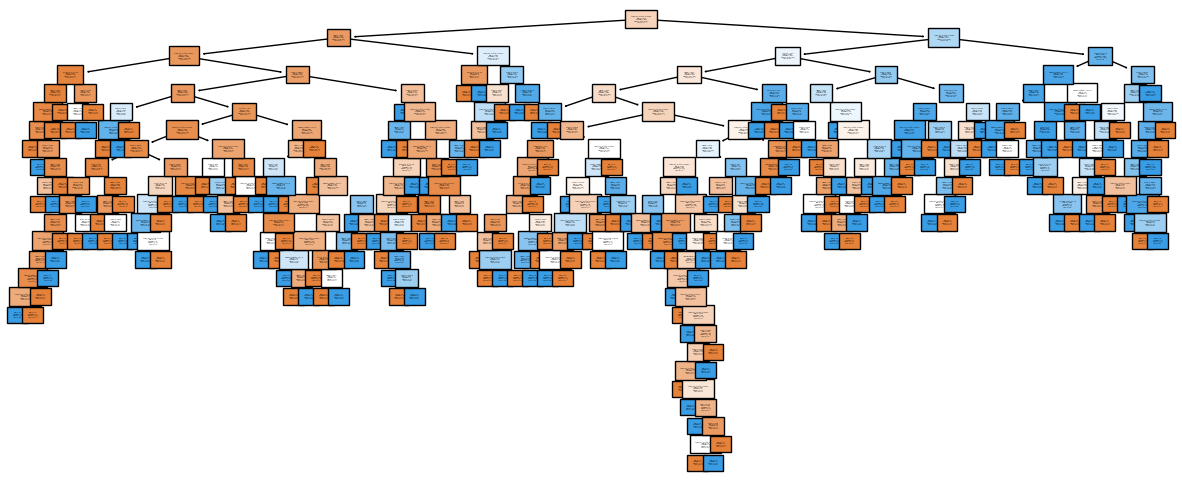

In [41]:
plt.figure(figsize=(15,6))
#1 parametro modelo que foi treinado
#2 parametro vai dar uma coloracao diferente para sim e nao
#3 parametro ao inves de ser 0 e 1 vai ser mostrado nao e sim
#4 parametro vai ser o tamanho da fonta das letras
#5 selecionando as colunas que serao apresentadas no grafico pelo nome_colunas
plot_tree(arvore, filled=True, class_names=['nao','sim'], fontsize=1, feature_names= nome_colunas);

#### Vendo resultado do score com base nos dados de treinamento


In [42]:
#overfitting
arvore.score(x_treino, y_treino)

1.0

In [43]:
#refazendo o codigo para que ele seja mais generalista

#1 parametro: defininfo a profundide maxima da arvore de 3 (3subarvores), ou seja 3 decisoes
arvore = DecisionTreeClassifier(max_depth=3 ,random_state=5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [44]:
#desempenho do modelo com dados de treino
arvore.score(x_treino, y_treino)

0.7613038906414301

In [45]:
#desempenho do modelo com dados de teste
arvore.score(x_teste, y_teste)

0.7160883280757098

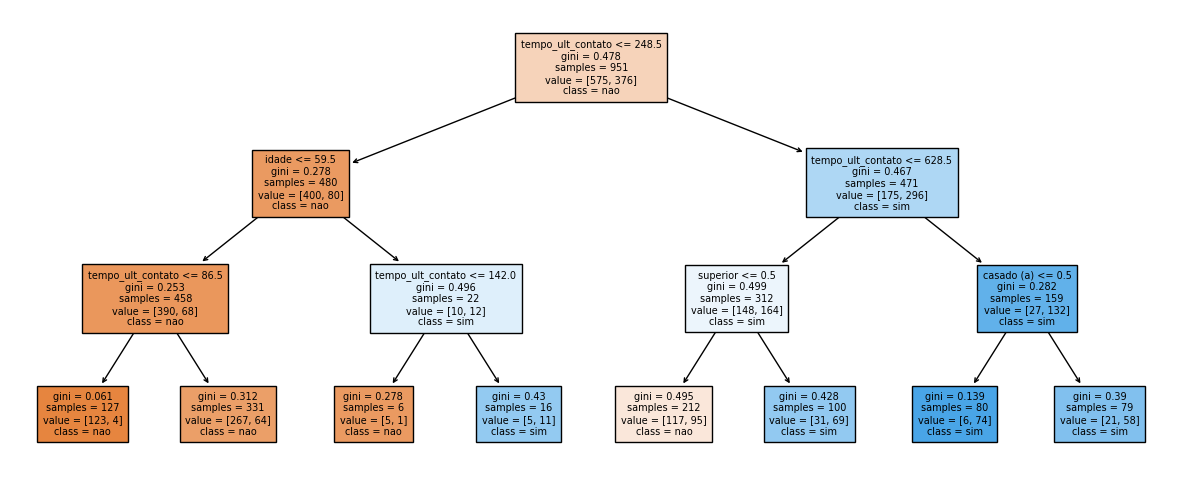

In [46]:
plt.figure(figsize=(15,6))
plot_tree(arvore, filled=True, class_names=['nao','sim'], fontsize=7, feature_names= nome_colunas);

## Usando o modelo KNN

#### Normalizando dados

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
#inicializando a funcao

normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [49]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


#### Normalizando dados de teste

In [53]:
x_teste_normalizado = normalizacao.transform(x_teste)

#### aplicando o KNN 

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [54]:
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

## Escolhendo e salvando o melhor modelo

In [55]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.6025236593059937
Acurácia Árvore: 0.7160883280757098
Acurácia KNN: 0.6876971608832808
